In [75]:
def filter_wave(file_path, cutoff_freq,start,duration):
    # read in wave file
    wave = thinkdsp.read_wave(file_path)
    wave.normalize()
    
    # segment wave file
    segment = wave.segment(start=start, duration=duration)
    segment.plot()
    plt.show()
    # create original spectrum
    spectrum_orig = segment.make_spectrum()
    spectrum_orig.plot()
    plt.title('Original Spectrum')
    plt.show()
    # create low-pass filtered spectrum
    spectrum_low = segment.make_spectrum()
    spectrum_low.low_pass(cutoff_freq)
    spectrum_low.plot()
    plt.title('Low-Pass Filtered Spectrum')
    plt.show()
    # create high-pass filtered spectrum
    spectrum_high = segment.make_spectrum()
    spectrum_high.high_pass(cutoff_freq)
    spectrum_high.plot()
    plt.title('High-Pass Filtered Spectrum')
    plt.show()


    # calculate total power for each spectrum
    total_power_orig = np.sum(np.abs(spectrum_orig.hs)**2)
    total_power_low = np.sum(np.abs(spectrum_low.hs)**2)
    total_power_high = np.sum(np.abs(spectrum_high.hs)**2)
    
    # plot the spectra and power bars
    labels = ['Original', 'Low-Pass Filtered', 'High-Pass Filtered']
    powers = [total_power_orig, total_power_low, total_power_high]
    plt.bar(labels, powers)
    plt.ylabel('Total Power')
    plt.show()
    
    # plot the spectra
    plt.figure(figsize=(10,5))
    spectrum_orig.plot(color='blue')
    spectrum_low.plot(color='green')
    spectrum_high.plot(color='red')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend(['Original', 'Low-Pass Filtered', 'High-Pass Filtered'])
    plt.show()
    
    # make audio for each wave and display the UIs
    display(Audio(segment.ys, rate=segment.framerate))
    display(Audio(spectrum_low.make_wave().ys, rate=segment.framerate))
    display(Audio(spectrum_high.make_wave().ys, rate=segment.framerate))
    return spectrum_orig

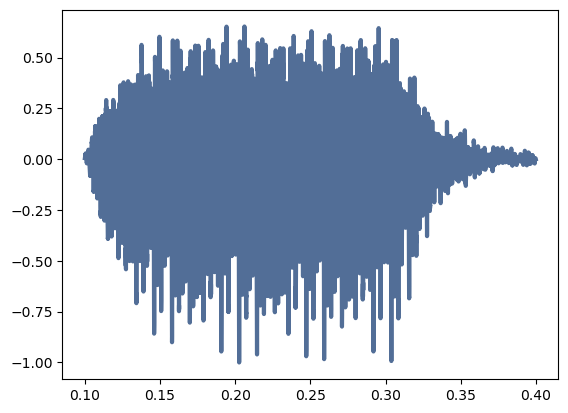

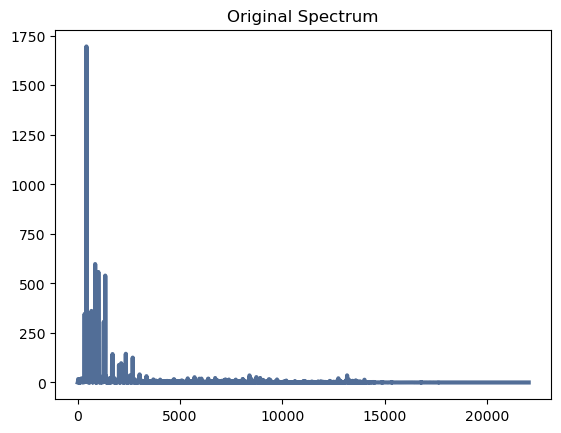

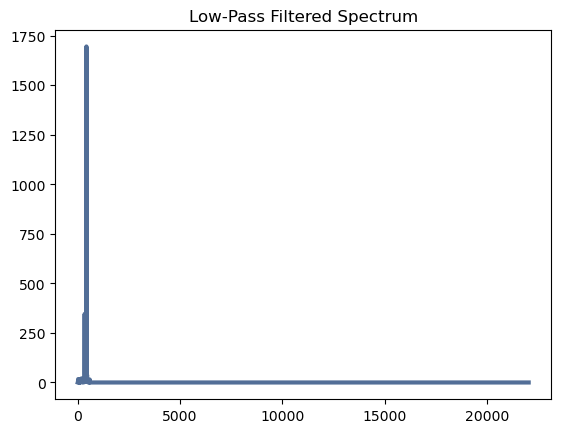

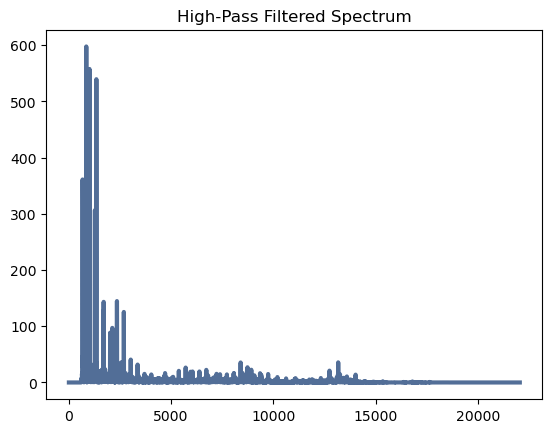

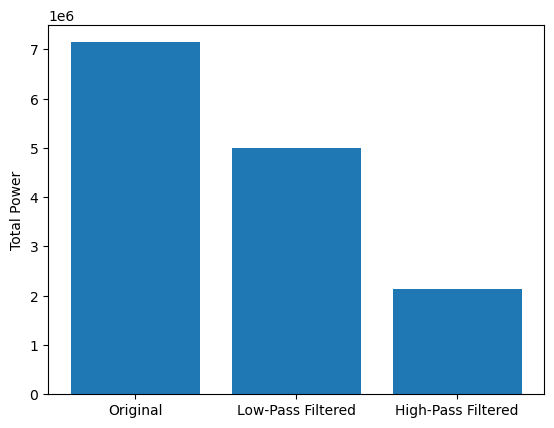

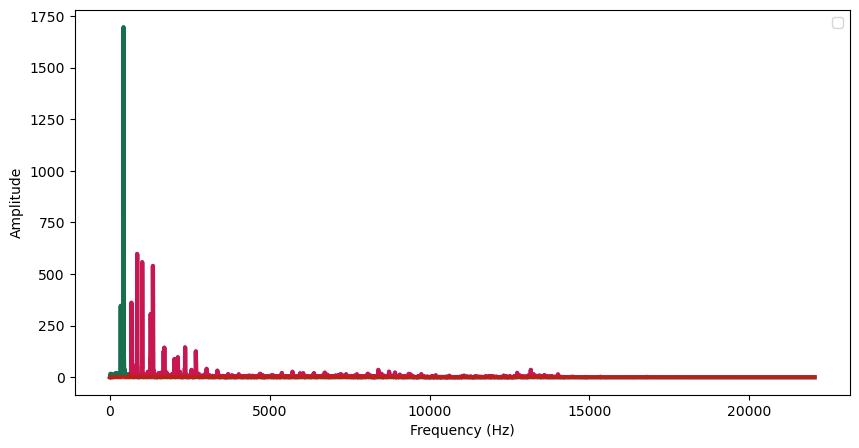

In [76]:
sp=filter_wave('car.wav', 600,0.1,0.3)


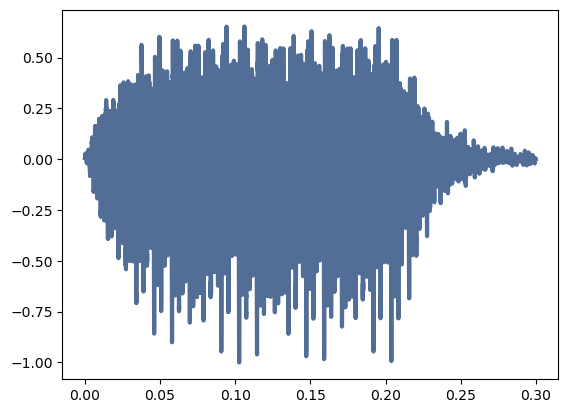

In [77]:
new_spectrum = thinkdsp.Spectrum(fs=sp.fs, hs=sp.hs, framerate=sp.framerate)
wave = new_spectrum.make_wave()
wave.plot()
wave.make_audio()

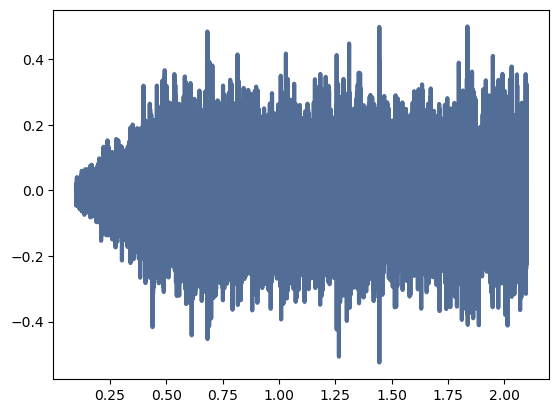

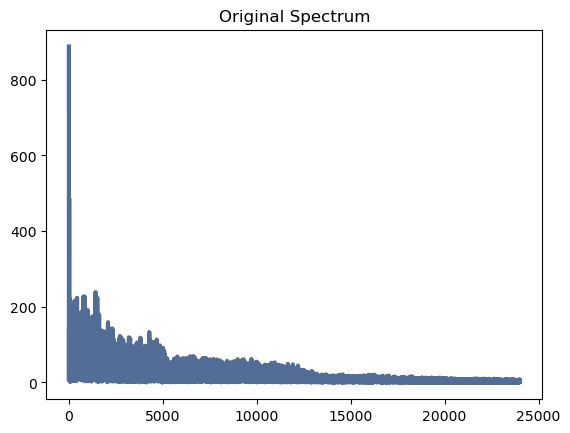

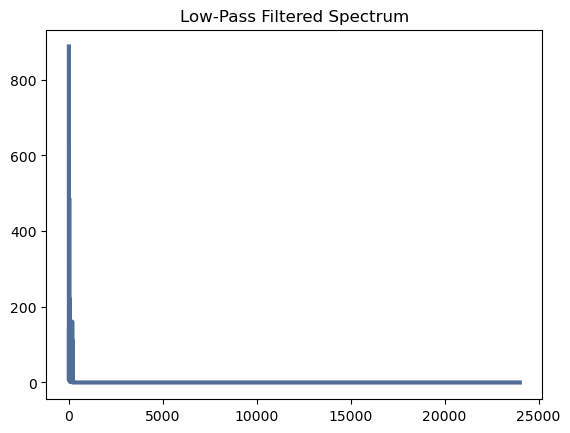

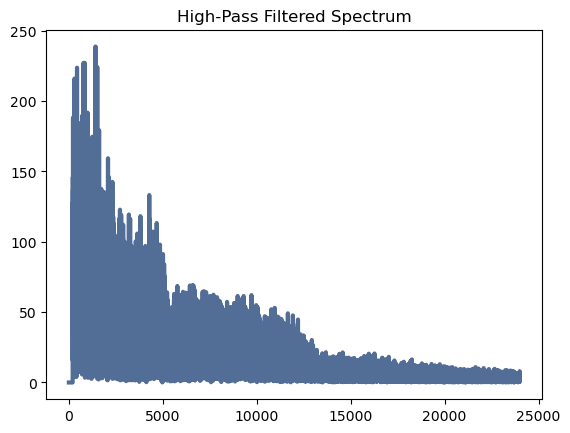

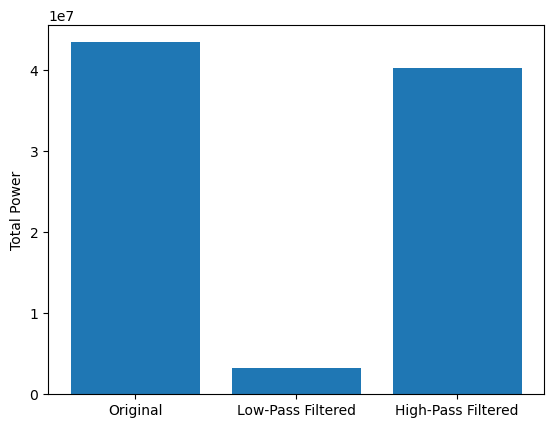

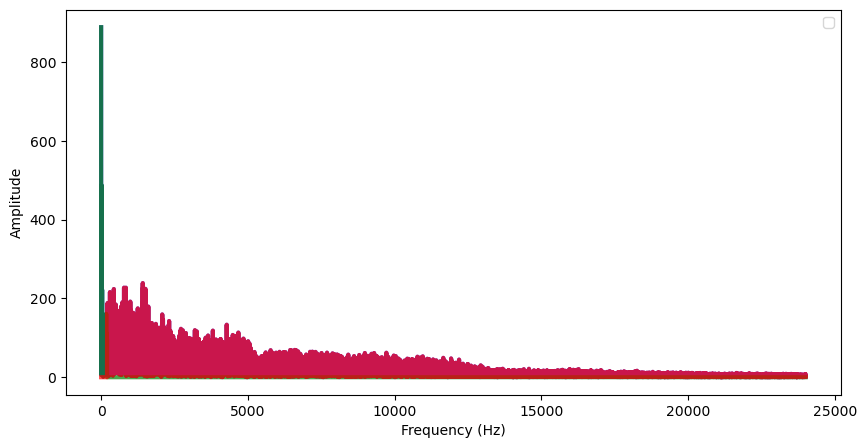

In [79]:
filter_wave('rain.wav', 200,0.1,2)